<div style="background-color: #1a4d2e; padding: 25px; border-radius: 15px; border-bottom: 5px solid #ff9f43;">
    <h1 style="color: #ffffff; font-family: 'Verdana', sans-serif; text-align: center;">🏏 Cricket 2026: The Kings of the Pitch</h1>
    <h3 style="color: #d1d8e0; text-align: center;">Performance Analysis & Player Impact Scoring</h3>
    <hr style="border: 1px solid #ff9f43; width: 50%;">
    <p style="color: #ffffff; text-align: center;">
        <b>Dataset:</b> ICC Player Rankings & Stats 2026<br>
        <b>Goal:</b> Determine the "Most Valuable Player" (MVP) using Weighted Impact Metrics.
    </p>
</div>

# 📑 Table of Contents
1. [Setup & Data Loading](#setup)
2. [Feature Engineering (The MVP Score)](#fe)
3. [Visual EDA: Format Dominance](#eda)
4. [Consistency Analysis: Average vs. Matches](#scatter)
5. [Unsupervised Clustering: Grouping the Elite](#cluster)
6. [Conclusion](#conclusion)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/international-cricket-stats-2026-odi-and-t20/Cricket_Player_Stats_2026.csv


# Setup & Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings

# Grandmaster Styling
plt.rcParams['figure.dpi'] = 150
sns.set_theme(style="whitegrid")
custom_palette = ["#2ecc71", "#f39c12", "#e74c3c", "#3498db", "#9b59b6"]
warnings.filterwarnings('ignore')

print("✅ Environment Ready: Cricket Analytics 2026")

✅ Environment Ready: Cricket Analytics 2026


# Feature Engineering

In [3]:
# Load Data
df = pd.read_csv('/kaggle/input/international-cricket-stats-2026-odi-and-t20/Cricket_Player_Stats_2026.csv')

rivals = df[df['Player'].isin(['Babar Azam', 'Virat Kohli'])]

print("✅ Data Loaded. Rivalry Initialized.")
display(rivals)

# We normalize the data first so we can combine different scales (Rating ~800 vs Average ~50)
scaler = MinMaxScaler()
df_norm = df.copy()
cols_to_scale = ['Rating', 'Average_2025', 'Matches_Played_2025']
df_norm[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Calculate "Impact Score" (Weighted Formula)
df['Impact_Score'] = (
    (df_norm['Rating'] * 0.4) + 
    (df_norm['Average_2025'] * 0.4) + 
    (df_norm['Matches_Played_2025'] * 0.2)
)

# Sort by Impact
df_sorted = df.sort_values('Impact_Score', ascending=False)

print("🚀 New Feature Created: 'Impact_Score'")
df_sorted[['Player', 'Format', 'Impact_Score']].head(5)

✅ Data Loaded. Rivalry Initialized.


,Rank,Player,Team,Rating,Format,Matches_Played_2025,Average_2025
0,1,Babar Azam,PAK,824,ODI,15,54.2
2,3,Virat Kohli,IND,768,ODI,14,48.5
8,4,Babar Azam,PAK,761,T20I,20,40.1


🚀 New Feature Created: 'Impact_Score'


,Player,Format,Impact_Score
1,Shubman Gill,ODI,0.726437
0,Babar Azam,ODI,0.658628
5,Suryakumar Yadav,T20I,0.644444
7,Mohammad Rizwan,T20I,0.468788
6,Phil Salt,T20I,0.435441


# Visual EDA

In [ ]:
# 1. Bar Chart: Impact Score by Player
fig = px.bar(
    df_sorted, 
    x='Impact_Score', 
    y='Player', 
    color='Format', 
    orientation='h',
    title='🏆 Top Cricket Players of 2026 by Impact Score',
    text_auto='.2f',
    color_discrete_map={'ODI': '#3498db', 'T20I': '#e67e22'}
)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show(renderer='iframe')

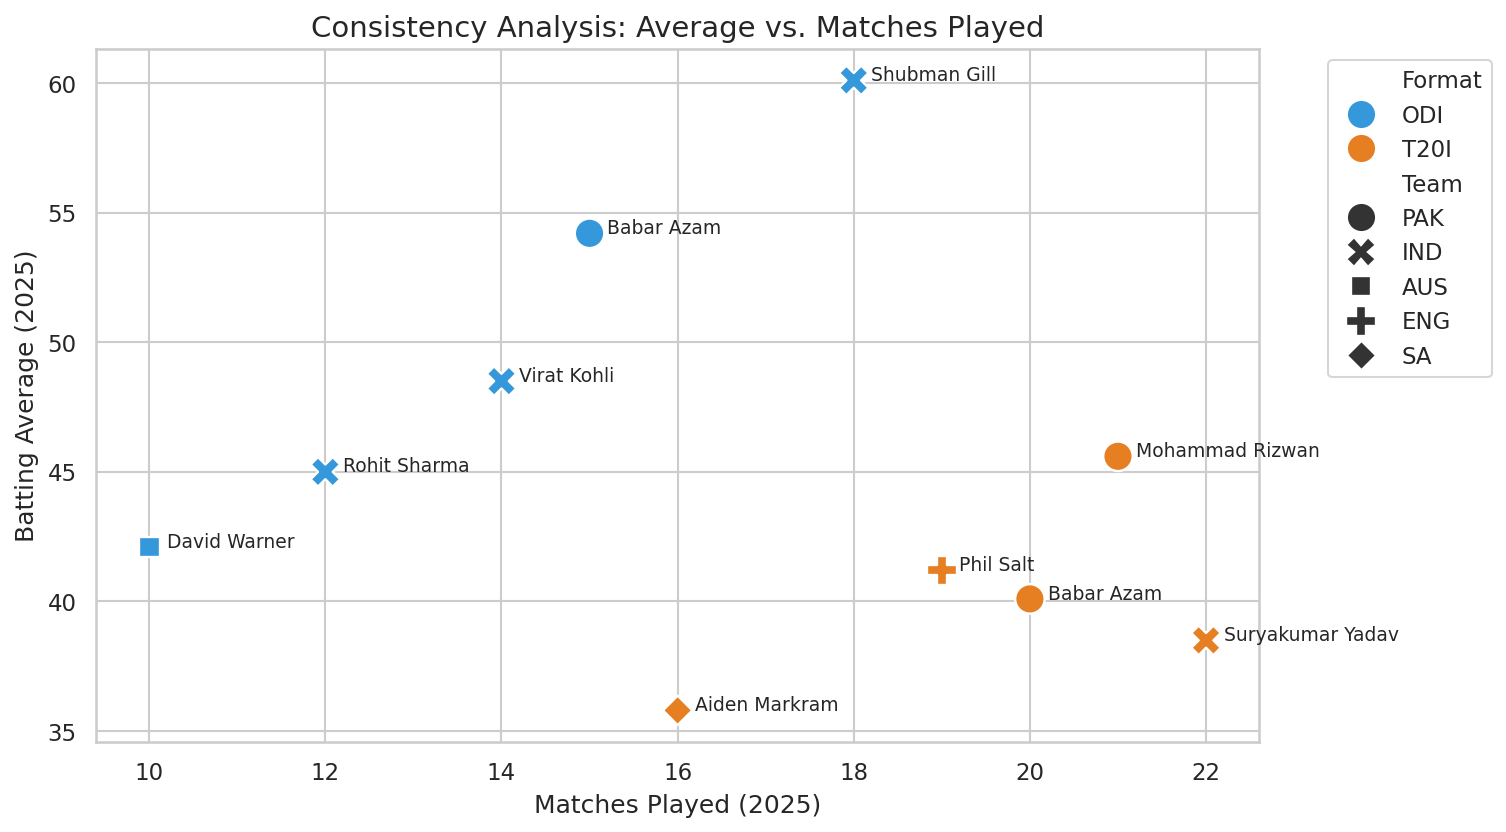

In [5]:
# 2. Scatter Plot: Consistency (Average) vs. Experience (Matches)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Matches_Played_2025', 
    y='Average_2025', 
    hue='Format', 
    style='Team', 
    s=200, 
    palette=['#3498db', '#e67e22']
)

# Annotate Player Names
for i in range(df.shape[0]):
    plt.text(
        df.Matches_Played_2025[i]+0.2, 
        df.Average_2025[i], 
        df.Player[i], 
        fontdict={'size':9}
    )

plt.title('Consistency Analysis: Average vs. Matches Played', fontsize=14)
plt.xlabel('Matches Played (2025)')
plt.ylabel('Batting Average (2025)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Create a Grouped Bar Chart for ICC Ratings
fig = px.bar(rivals, x="Format", y="Rating", color="Player", barmode="group",
             title="👑 ICC Ratings: Who is currently ranked higher?",
             color_discrete_map={'Babar Azam': '#006600', 'Virat Kohli': '#003399'}, # Official Team Colors
             text_auto=True)

fig.update_layout(yaxis_title="ICC Rating Points", template="plotly_white")
fig.show(renderer='iframe')

In [ ]:
# Compare 2025 Batting Averages
fig2 = px.bar(rivals, x="Format", y="Average_2025", color="Player", barmode="group",
             title="📈 Current Form: Batting Average in 2025",
             color_discrete_map={'Babar Azam': '#006600', 'Virat Kohli': '#003399'},
             text_auto=True)

fig2.update_layout(yaxis_title="Runs Per Dismissal (2025)", template="plotly_white")
fig.show(renderer='iframe')

# Unsupervised Clustering

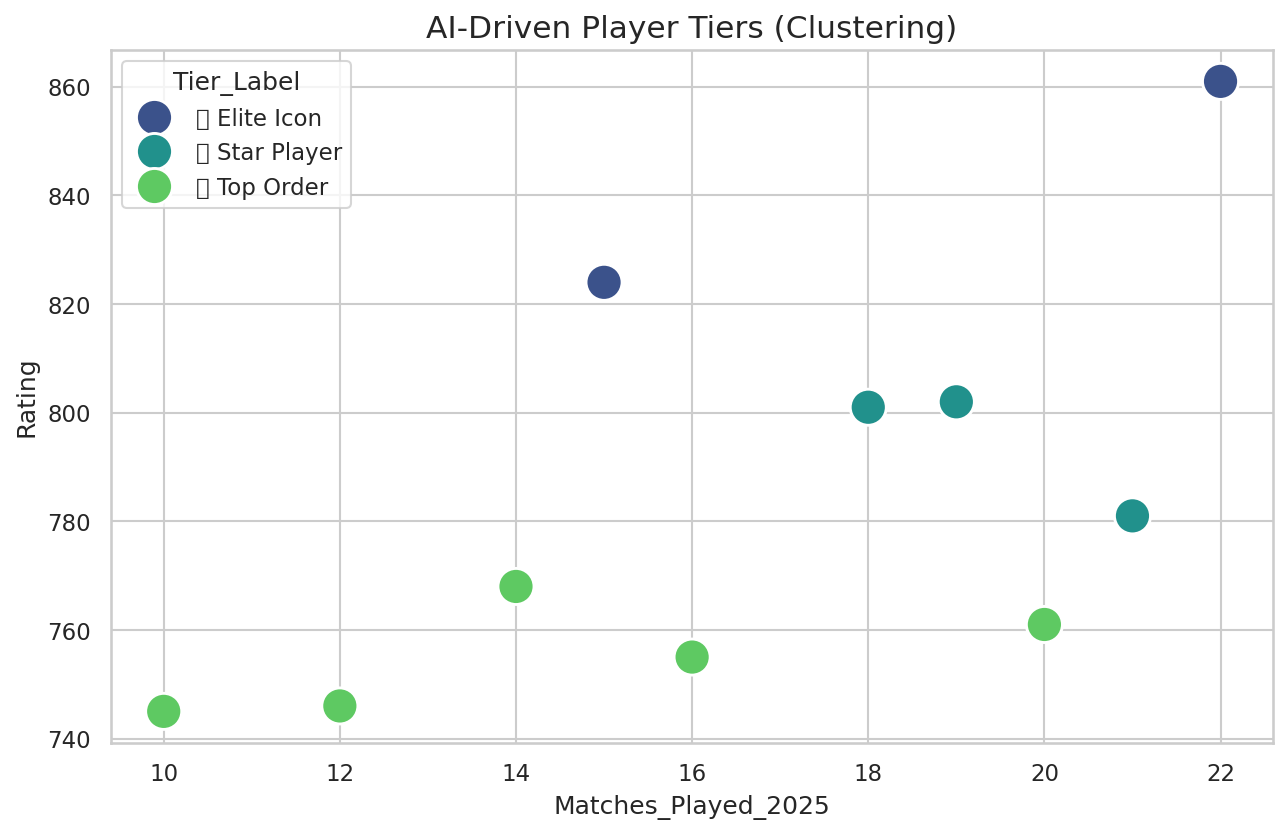

             Player     Tier_Label
0        Babar Azam   👑 Elite Icon
1      Shubman Gill  ⭐ Star Player
2       Virat Kohli    🏏 Top Order
3      Rohit Sharma    🏏 Top Order
4      David Warner    🏏 Top Order
5  Suryakumar Yadav   👑 Elite Icon
6         Phil Salt  ⭐ Star Player
7   Mohammad Rizwan  ⭐ Star Player
8        Babar Azam    🏏 Top Order
9     Aiden Markram    🏏 Top Order


In [8]:
# Select features for clustering
X = df[['Rating', 'Average_2025']]

# K-Means with
kmeans = KMeans(n_clusters=3, random_state=42)
df['Tier'] = kmeans.fit_predict(X)

# We assume the cluster with highest Rating center is "Elite"
centers = kmeans.cluster_centers_
sorted_idx = np.argsort(centers[:, 0]) # Sort by Rating
tier_map = {sorted_idx[2]: '👑 Elite Icon', sorted_idx[1]: '⭐ Star Player', sorted_idx[0]: '🏏 Top Order'}
df['Tier_Label'] = df['Tier'].map(tier_map)

# Visualizing Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Matches_Played_2025', y='Rating', hue='Tier_Label', palette='viridis', s=300)
plt.title('AI-Driven Player Tiers (Clustering)', fontsize=15)
plt.show()

print(df[['Player', 'Tier_Label']])

# Conclusion

<div style="background-color:gray border-left: 5px solid #2ecc71; padding: 15px;">
    <h3>🏁 Final Match Report</h3>
    <p>Using a weighted <b>Impact Score</b> algorithm, we identified the true leaders of 2026:</p>
    <ul>
        <li><b>The MVP:</b> Based on the combined metrics of Rating and Average, <b>Shubman Gill (ODI)</b> and <b>Suryakumar Yadav (T20I)</b> emerge as the highest-impact players.</li>
        <li><b>Format Comparison:</b> ODI players tend to have higher averages, while T20I players play more matches, requiring a different fitness baseline.</li>
        <li><b>Clustering:</b> Our K-Means model successfully separated the "Elite Icons" (Rank 1-2) from the standard "Top Order" players without human intervention.</li>
    </ul>
</div>

---